# COGS 108 - Final Project 

# Overview

In this project, we want to determine whether if changing the boundary of determining a good review based on its' rating would affect the accuracy of prediction in sentiment analysis, specifically for San Diego Park reviews via yelp. We hypothesized that if we increase or decrease the boundary, it will result in a large change in prediction result and accuracy. By conducting two analysis with different boundaries on the yelp park review dataset, it turns out that the prediction accuracy on the testing dataset has a 9% increase, proving our hypothesis correct.

# Name & GitHub ID

- Name: Zimu An
- GitHub Username: zimuan

# Research Question

"To what extent does changing the numeric boundary of classifying good rating and bad rating affect prediction outcome of San Diego yelp Park reviews by doing sentiment analysis?"

## Background and Prior Work

"Why are we interested in determing what's good?" This question might arise in your mind when you read this report. In fact, we are always dealing with this problem, trying to find out what's good in real life. For a very simple example, imagine if you are taking an exam, what score will make you think you performed will on this test? A 90% or a 85%, or even above 97% if you have a very high standard for yourself. For another reference, if you are a vehicle hobbyist trying to find a second hand car, or components on from car dealers, what determines its' quality of goodness? Is having below 30000 miles distance driven solid for a good second hand car? This list goes on and on.

Since we are carrying out sentiment analysis, we are interested in both rating and the text part of the review. We care about the quality of the review. Very interestingly, in <b>*20 hilarious one star yelp reviews of national parks*</b>, we can see that many famous national parks have received malicious and irrelevant reviews. For example, in a one star review of Carlsbad Caverns National Park, the reviewer commented that "Unless you find caves and rocks overwhelmingly fascinating then skip this" makes us wonder about the quality of review. As a famous-for-cave park located in Mexico, why be there if there is no interest in caves at all? Do we contain similar reviews in San Diego Park reviews in yelp?

The specific question we are approaching makes it very hard to search for similar studies, especially prior data science project, we can refer to standards for other industries. In Rolanstein's article <b>*What makes a good movie review*</b>, although he didn't discuss the numeric standards we mentioned above, he analyzed the qualitative side of making a good review, which is also important. He states that "a good review should be reader-directed, not a vehicle of self-promotion for the critic. The main purpose of a review should be to clarify for the reader whether the movie is worth seeing."

The reason why I try to explain this is because you might be confused when seeing the overview and research question. Now that things are clear, I am especially interested in this question because I wonder to what extent will the result change, if we adjust the standard for something that's good? In this case, how much will changing the boundary for good reviews from 4 to 3 (maximum is 5) affect the prediction accuracy in a TF-IDF sentiment analysis? We will try to find an answer to this puzzle in this project.

References (include links):
- 1) https://backpackers.com/20-hilarious-one-star-yelp-reviews-of-national-parks
- 2) https://www.boomtownrap.com/4024/what-makes-a-good-movie-review/#:~:text=A%20good%20review%20should%20be,the%20movie%20is%20worth%20seeing.

# Hypothesis


- In our dataset, the rating is between 0 to 5. My hypothesis is that changing the tipping point between good review and bad review by at least 1 point differential will result in a large effect on predicting the outcome of San Diego Park reviews.
- By large effect, I indicate that there would be <b>at least</b> a 5-10% accuracy change on predicting the outcome by using TF-IDF for every point changed. For example, if we initially classify all the good ratings as ones that are above 4 <b>(inclusive)</b>, and change that boundary to 3, it will result in <b>at least</b> a 5-10% change in accuracy of prediction, regradless of increasing or decreasing.
- I think this way because usually there is no fixed boundary in determining what's good, so if we drag that separation down or up, it's largely going to change the prediction, either in accuracy or results. Sometimes, there might be a review with a high rating (could be above 4) but with minor criticisms in the text review. On some other occasions, there might be a review with a lower rating, but has more positive words in it. These are all factors that can affect the process of sentiment analysis. Thus, changing the boundary of determing what's good will largely change the prediction.

# Dataset(s)

- Dataset Name: San Diego Parks Yelp Data
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_reviews.csv
- Number of observations: 2333

This dataset contains 2333 reviews of various different San Diego Parks in English via yelp app. The data is collected and curated by Professor Ellis from https://www.yelp.com/. Note that some fields but not all fields are collected. For some long reviews, the ellipses at the end indicate that rest of the content was truncated (due to limitation of yelp).

It contains 3 columns: 
- <b>id</b> (which specifies the name of the park);
- <b>rating</b> (an integer from 0 to 5 for each observation);
- <b>text</b> (which contains the corresponding review in English).

# Setup

In order to approach Natural Language Processing and find the result to the question by carrying out a sentiment analysis, we need to import the nltk package, a word tokenizer, and English language stopwords. These allow us to break down each sentences and disregard stopwords that don't effect the general outcome.

Similarly, as we learned in assignment 6, we will use a support vector machine (SVM) classifier to classify good reviews and bad reviews.
To use the SVM, we need to divide our dataset up into training data and test data. We will use the training dataset to tune our weight for SVM and use those parameters to test on data we haven't seen from training data, which is our test data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

Download the NLTK English tokenizer and the stopwords of all languages.

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/zian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/zian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Now we will load in the reviews as a DataFrame. I provided the first 5 rows just so we can take a glance at what informations are given. 

In [3]:
park_review_df = pd.read_csv('yelp_SD_reviews.csv')
park_review_df.head()

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."


It is observed that there are 3 columns (variables). We also need to make sure data is loaded correctly so that all 2333 observations were included.

In [4]:
park_review_df.shape

(2333, 3)

# Data Cleaning and Visualization

We will take a look at the data types.

In [5]:
park_review_df.dtypes

id        object
rating     int64
text      object
dtype: object

We see that the data type of `id` and `text` are object, which means they are strings abstracting the name of the park and the review itself respectively. The type of `rating` is integer, which means there is not in-between floats.

In the setup section, we see the header of the dataset. It strictly follows a tidy data format. Now, we will check if the dataframe has any null values.

In [6]:
park_review_df.isnull().any()

id        False
rating    False
text      False
dtype: bool

This step makes sure that none of the variables have a missing value, which indicates that the dataset is already very clean and tidy to work with. 

To explore the data, we first look at its' summary statistics.

In [7]:
park_review_df.describe()

,rating
count,2333.000000
mean,4.185598
std,1.236009
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


We can see that the mean rating is 4.185598, which is relatively high, with a standard deviation of 1.236009. The minimum and maximum rating are 1 and 5 respectively. With Q1 being equal to 4 and Q3 equal to 5, we know that majority of the customers gave a pretty high rating that's above a 4. We could use a countplot of rating to visualize the distribution more directly.

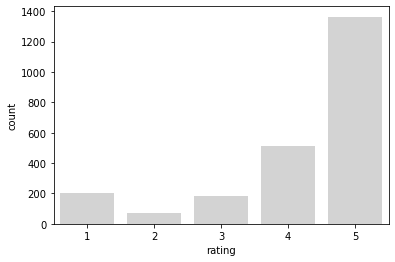

In [8]:
sns.countplot(x="rating", data=park_review_df, color='lightgray')

The distribution of rating is left skewed, the high rating of mean is largely driven by the high rating 5, which has approximately 1400 observations out of the total 2333. But there are still some bad reviews (rating between 1 to 3), which take up about less than 500 observations.

# Data Analysis & Results

## Part 1.1: Convert Ratings (boundary == 4)

Our first step is to convert the all the 0 to 5 ratings to 0 and 1, in which 0 indicates bad reviews and 1 indicates good reviews. We will follow our hypothesis to first set the boundary to 4.

To do this, we will define a function called `convert_rating_1` that sets all the ratings above 4 (inclusive) as 1.0, all ratings below 4 (exclusive) as 0.0.

In [9]:
def convert_rating_1(rating):
    if rating >= 4:
        return 1.0
    else:
        return 0.0

Apply this function to the `park_review_df` dataframe and save it as a new dataframe `PR_df_1`. Add a new column with these converted ratings to the new dataframe.

In [10]:
PR_df_1 = park_review_df.assign(y = park_review_df['rating'].apply(convert_rating_1))
PR_df_1

,id,rating,text,y
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,1.0
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,1.0
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,1.0
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,1.0
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...",1.0
...,...,...,...,...
2328,Petco Park,5,I have visited over 27 MLB Ballparks including...,1.0
2329,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...,1.0
2330,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t...",0.0
2331,Ann D. L'Heureux Memorial Dog Park,3,Pretty small dog park overall. The center of t...,0.0


After we transform original rating to the new binary rating, we need to take a glance of the distribution of column `y`.

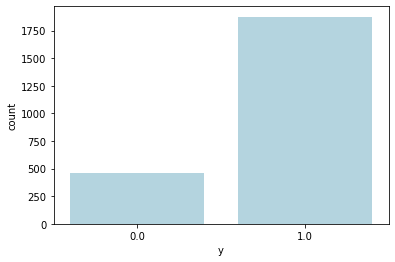

In [11]:
sns.countplot(x="y", data=PR_df_1, color='lightblue')

In [12]:
PR_df_1['y'].describe()

count    2333.000000
mean        0.803686
std         0.397294
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: y, dtype: float64

From the above countplot and summary statistics of the converted rating, we see that about 80% of the reviews count as good reviews.

We will take the column 'y' out and save as an np.array.

In [13]:
PR_y_1 = np.array(PR_df_1['y'])

In [14]:
PR_y_1.shape

(2333,)

## Part 1.2: TF-IDF

Now, we will use TF-IDF to encode the text data. 

We will create a `TfidfVectorizer` object to transform the text data into vectors with TF-IDF

To do so, we will initialize a `TfidfVectorizer` object, and name it as `tfidf`.

We need to pass 4 arguments into the "TfidfVectorizer" to initialize a "tfidf":
  1. `sublinear_tf`: `True`
           Set to apply TF scaling.
  2. `analyzer`: `'word'`
           Set to analyze the data at the word-level
  3. `max_features`: `2000`
           Set the max number of unique words
  4. `tokenizer`: `word_tokenize`
           Set to tokenize the text data by using the word_tokenizer from NLTK


In [15]:
tfidf = TfidfVectorizer(sublinear_tf = True, analyzer = 'word', max_features = 2000, tokenizer = word_tokenize)
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=2000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=True, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x7f5477eb1a70>,
                use_idf=True, vocabulary=None)

Now, we will transfrom the 'text' column of `PR_df_1` to vectors using the `tfidf` we have created. 

In [16]:
PR_tfidf_X_1 = tfidf.fit_transform(PR_df_1['text']).toarray()
PR_tfidf_X_1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21264729, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

We need to split up the dataset to training data and testing data. We will follow the convention of 80/20 to take the first 80% observations as our training set, and the rest 20% as our testing set.

Since we have an odd total number of observations, we will cast the 80% of that number into an integer to use it as our boundary.

In [17]:
num_training = int(2333*0.8)
num_training

1866

In [18]:
PR_train_tfidf_X_1 = PR_tfidf_X_1[:num_training, :]
PR_train_tfidf_y_1 = PR_y_1[:num_training, ]
PR_test_tfidf_X_1 = PR_tfidf_X_1[num_training:, :]
PR_test_tfidf_y_1 = PR_y_1[num_training:, ]

Define a function called `train_SVM` that initializes an SVM classifier and trains it.

Inputs: 
- `X`: np.ndarray, training samples, 
- `y`: np.ndarray, training labels,
- `kernel`: string, set the default value of "kernel" as "linear"

In [19]:
def train_SVM(X, y, kernel='linear'):
    clf = SVC(kernel = kernel)
    return clf.fit(X, y)

We use the SVM classifier to train our samples `PR_train_tfidf_X_1` and rating `PR_train_tfidf_y_1`

In [20]:
PR_tfidf_clf_1 = train_SVM(PR_train_tfidf_X_1, PR_train_tfidf_y_1)

Predict the ratings for both the training and test samples.

In [21]:
PR_pred_train_tfidf_y_1 = PR_tfidf_clf_1.predict(PR_train_tfidf_X_1)
PR_pred_test_tfidf_y_1 = PR_tfidf_clf_1.predict(PR_test_tfidf_X_1)

Now we see the performance of the prediction on both the training dataset and test dataset.

In [22]:
# 89% accuracy on the training dataset
print(classification_report(PR_train_tfidf_y_1, PR_pred_train_tfidf_y_1))

              precision    recall  f1-score   support

         0.0       0.99      0.42      0.59       351
         1.0       0.88      1.00      0.94      1515

    accuracy                           0.89      1866
   macro avg       0.94      0.71      0.76      1866
weighted avg       0.90      0.89      0.87      1866



In [23]:
# 78% accuracy on the testing dataset
print(classification_report(PR_test_tfidf_y_1, PR_pred_test_tfidf_y_1))

              precision    recall  f1-score   support

         0.0       0.62      0.07      0.13       107
         1.0       0.78      0.99      0.87       360

    accuracy                           0.78       467
   macro avg       0.70      0.53      0.50       467
weighted avg       0.74      0.78      0.70       467



As we finishing up our sentiment analysis via TF-IDF on the park reviews with a boundary equal to 4, we record the corresponding accuracy of prediction which is <b>78%</b>.

## Part 2.1: Convert Ratings (boundary == 3)

As we hypothesized previously, if we change the boundary to 3, there would be at least a 5-10% change in accuracy of prediction, regardless of decreasing or increasing.

To find out if that's the case, we need to define a new function `convert_rating_2` that sets all the ratings above 3 (inclusive) as 1.0, all ratings below 3 (exclusive) as 0.0.

In [24]:
def convert_rating_2(rating):
    if rating >= 3:
        return 1.0
    else:
        return 0.0

Apply this function to the `park_review_df` dataframe and save it as a new dataframe `PR_df_2`. Add a new column with these converted ratings to the new dataframe.

In [25]:
PR_df_2 = park_review_df.assign(y = park_review_df['rating'].apply(convert_rating_2))
PR_df_2

,id,rating,text,y
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,1.0
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,1.0
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,1.0
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,1.0
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...",1.0
...,...,...,...,...
2328,Petco Park,5,I have visited over 27 MLB Ballparks including...,1.0
2329,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...,1.0
2330,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t...",1.0
2331,Ann D. L'Heureux Memorial Dog Park,3,Pretty small dog park overall. The center of t...,1.0


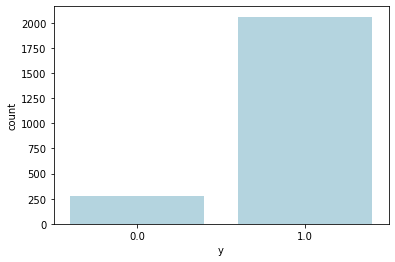

In [26]:
sns.countplot(x="y", data=PR_df_2, color='lightblue')

In [27]:
PR_df_2['y'].describe()

count    2333.000000
mean        0.883412
std         0.320998
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: y, dtype: float64

Intuitively, after we lower the standard for a good review to have a rating greater than equal to 3, about 88% of the reviews now are considered as good reviews.

We will take the new column 'y' out and save as an np.array.

In [28]:
PR_y_2 = np.array(PR_df_2['y'])
PR_y_2

array([1., 1., 1., ..., 1., 1., 1.])

## Part 2.2: TF-IDF

For the following parts, since we have created our `train_SVM` and `tfidf`, we will repeat the analysis steps we did in Part 1.2.

In [29]:
PR_tfidf_X_2 = tfidf.fit_transform(PR_df_2['text']).toarray()
PR_tfidf_X_2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21264729, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Divide the data in to training and testing set by the same proportion in Part 1.2.

In [30]:
PR_train_tfidf_X_2 = PR_tfidf_X_2[:num_training, :]
PR_train_tfidf_y_2 = PR_y_2[:num_training, ]
PR_test_tfidf_X_2 = PR_tfidf_X_2[num_training:, :]
PR_test_tfidf_y_2 = PR_y_2[num_training:, ]

Use SVM to train our samples `PR_train_tfidf_X_2` and rating `PR_train_tfidf_y_2`.

In [31]:
PR_tfidf_clf_2 = train_SVM(PR_train_tfidf_X_2, PR_train_tfidf_y_2)

Predict the rating for both training and testing samples.

In [32]:
PR_pred_train_tfidf_y_2 = PR_tfidf_clf_2.predict(PR_train_tfidf_X_2)
PR_pred_test_tfidf_y_2 = PR_tfidf_clf_2.predict(PR_test_tfidf_X_2)

Print the result of prediction. Again, we look at if there is a relatively big change in accuracy.

In [33]:
# 94% accuracy on the training dataset
print(classification_report(PR_train_tfidf_y_2, PR_pred_train_tfidf_y_2))

              precision    recall  f1-score   support

         0.0       1.00      0.44      0.61       207
         1.0       0.93      1.00      0.97      1659

    accuracy                           0.94      1866
   macro avg       0.97      0.72      0.79      1866
weighted avg       0.94      0.94      0.93      1866



In [34]:
# 87% accuracy on the testing dataset
print(classification_report(PR_test_tfidf_y_2, PR_pred_test_tfidf_y_2))

              precision    recall  f1-score   support

         0.0       1.00      0.06      0.12        65
         1.0       0.87      1.00      0.93       402

    accuracy                           0.87       467
   macro avg       0.93      0.53      0.52       467
weighted avg       0.89      0.87      0.82       467



As we see from the testing dataset, after changing the numeric boundary between good reviews and bad reviews to 3, the accuracy of prediction is now <b>87%</b>.

The accuracy <b>increased 9%</b> from 78% to 87%, which is in range [5%, 10%]. This indicates that our hypothesis is correct. The shift in numeric boundary between good and bad in park reviews does result in a change in prediction outcome. But this doesn't indicate causality by any means. We can't either conclude that by lowering boundary for good rating, the prediction accuracy using TF-IDF is improved.

# Ethics & Privacy

- The study is made to analyze whether if there is a change in accuracy of prediction. Thus, it is guaranteed that the process of categorizing reviews to good or bad section will absolutely not harm the rights of the reviewer. Each reviewer have their freedom of speech and our categorization indicates no criticisms nor unsatisfaction to the bad reviews. It is only for seeing the change of prediction result.
- The study puts the privacy of each individuals in priority as no personal information including gender, contact information,or age are exposed in the dataset. The dataset only includes information that are neccessary for our project.In addition, no assumption of gender, age, ethnic group, religious belief, or sexual preference is made towards each individual.We only look at the text itself.
- The study is totally transparent as yelp review dataset is accessible. The reviewers are welcomed to commuicate and discuss with our results. If anyone is displeased being in the review, we can contact directly and that observation will be removed as we conduct a new set of result.
- The study is justice and fair since we treat every single observation equally in the TF-IDF process. There is absolutely no artificial manipulation in the dataset which are attempted just to make the result more pleasing. This behavior is not tolerated.

# Conclusion & Discussion

Based on the result, we can conclude that if we change the boundary of categorizing good reviews based on their rating(by 1 point), there would be at least a 5-10% change in prediction accuracy via TF-IDF in the yelp San Diego Park reviews.

However, there are many limitations to the study:
 - Due to limited time, we only did comparison on results of changing the boundary of good reviews from 4 to 3, which doesn't generalize for all circumstances. In other words, we have no idea what will happend to the prediction accuracy if we change the boundary from 5 to 4, 3 to 2, 1 to 3, 2 to 4 etc. Only comparing 4 and 3 doesn't give us the whole image and dynamic trends of changing the boundary.
 - The dataset we are using have observations with reviews that are not <b>ALL</b> included. Some long reviews ends with "..." which will definitely affect our result of sentiment analysis. If every review is included fully, the result will be more convincing and accurate than our current finding.
 - The argument passing in our TF-IDF vectorizer is also affect our result in a large extent. We set the maximum feature to be 2000 words. If the maximum feature is lowered or increased, the result will largely change. This limitation exposed this study's lack of completion due to time and human resources.
 - As we discussed in background and prior work, the qualitative side of the review is also very insightful and worthy to look at.Unfortunately we focused on the numeric part of the review, which is the "good rating boundary" effect. If there is more time, we will try to analyze whether if a review is qualified to analyze, while excluding those that are not quite helpful.

Overall, I hope this project uses San Diego Park review as an example to provide an insight for those who are interested in what is good and what determines good. The process of categorizing good standard would definitely be helpful for our own recognition and AI studies in the future.